<a href="https://colab.research.google.com/github/AlexK2003/Class-Assignments/blob/main/CS%204410/EX%2015%2017/EX_15_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EX 15.17

Check out the Breast Can-
cer Wisconsin Diagnostic dataset that’s bundled with scikit-learn
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-
dataset
The dataset contains 569 samples, each with 30 features and a label indicating whether a
tumor was malignant (0) or benign (1). There are only two labels, so this dataset is com-
monly used to perform binary classification. Using this dataset, reimplement the steps of
this chapter’s classification case study in Sections 15.2–15.3. Use the GaussianNB (short
for Gaussian Naive Bayes) estimator. When you execute multiple classifiers (as in
Section 15.3.3) to determine which one is best for the Breast Cancer Wisconsin Diagnos-
tic dataset, include a LogisticRegression classifier in the estimators dictionary. Logistic
regression is another popular algorithm for binary classification.

# Loading the Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
print (breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Checking the Sample and Target Sizes


In [2]:
print ("Sample Size:")
print (breast_cancer.data.shape)
print ("Target Size:")
print (breast_cancer.target.shape)

Sample Size:
(569, 30)
Target Size:
(569,)


# Splitting the Data for Training and Testing

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=0)

# Training and Testing Set Sizes

In [5]:
X_train.shape

(426, 30)

In [6]:
X_test.shape

(143, 30)

# Creating the Model (GaussianNB)


In [7]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Training the Model

In [8]:
gnb.fit(X_train, y_train)

GaussianNB()

# Predicting

In [11]:
predicted = gnb.predict(X_test)

expected = y_test

print(predicted[:20])
print(expected[:20])

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0]


In [13]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(0, 1), (0, 1), (0, 1), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]

# Estimator Method score

In [14]:
print(f'{gnb.score(X_test, y_test):.2%}')

93.71%


# Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(expected, predicted)
print(confusion)

[[48  5]
 [ 4 86]]


#Classification Report

In [20]:
from sklearn.metrics import classification_report

print(classification_report(expected, predicted, target_names=breast_cancer.target_names))


              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        53
      benign       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



# Visualizing the Confusion Matrix


Text(50.722222222222214, 0.5, 'True Label')

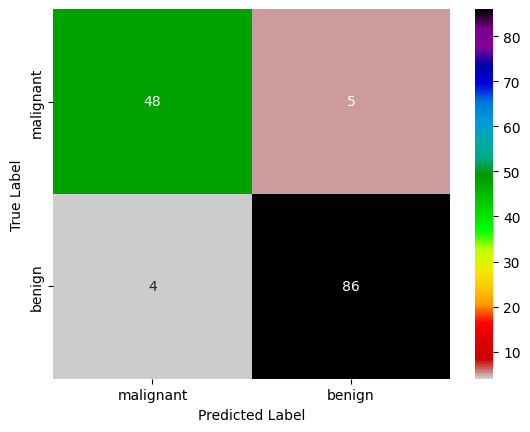

In [22]:
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=breast_cancer.target_names, columns=breast_cancer.target_names)
ax = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")


# K-Fold Cross-Validation

In [23]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=0, shuffle=True)

# Using the KFold Object with Function cross_val_score:


In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, breast_cancer.data, breast_cancer.target, cv=kfold)

In [25]:
scores

array([0.9122807 , 0.94736842, 0.92982456, 0.94736842, 0.98245614,
       0.87719298, 0.94736842, 0.9122807 , 1.        , 0.92857143])

In [26]:
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

Mean accuracy: 93.85%
Accuracy standard deviation: 3.36%


# Running Multiple Models to Find the Best One:   



In [33]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
estimators = {
     'GaussianNB': gnb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}

In [37]:
import warnings
warnings.filterwarnings('ignore')
for estimator_name, estimator_object in estimators.items():

  kfold = KFold(n_splits=10, random_state=11, shuffle=True)

  scores = cross_val_score(estimator=estimator_object,

  X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

  print(f'{estimator_name:>20}: ' +

  f'mean accuracy={scores.mean():.2%}; ' +

  f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%


Based on this it appears Logistic Regression has the best accuracy for this dataset